# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users: 

Telco Company management team

#### True business problem:

Create a model that can, if given data from telco about the information of a customer, predict whether the customer will churn

#### Which type of churn?
Voluntary – they left after contract was up
Involuntary – we fired them
Early churn – left early, broke contract

#### Context:

Negative: will not churn
Positive: will churn

- **False negative** Predict a customer will not churn but actually will churn
    - **Outcome**: lose customers --> minimize FN,
- **False positive** Predict a customer will churn but actually will not
    - **Outcome**: overspend on the customer --> optimize for false positive / recall

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision

<b> - Recall </b>
- F1-Score

## Part 3: Segment choice

What type slice/segment/type of churn you are interested in?

## Part 4: Data Prep Code

In [41]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
teco_full = telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2229, 42)

In [42]:
encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()
# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
# Reassemble entire training dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

In [2]:
clean_X_train.columns

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue',
       'gender_Male', 'MaritalStatus_Yes', 'Dependents_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
 

In [20]:
clean_X_train_full = clean_X_train

In [21]:
clean_X_train_full['churn2'] = y_train

In [27]:
len(clean_X_train_full.loc[clean_X_train_full['churn2'] == 1]) / len(clean_X_train_full)  #model-less baseline

0.1911170928667564

## Part 5: Create models

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(clean_X_train)
X_test_scaled = scaler.transform(clean_X_test)

In [48]:
vanilla_mod = LogisticRegression()
vanilla_mod.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

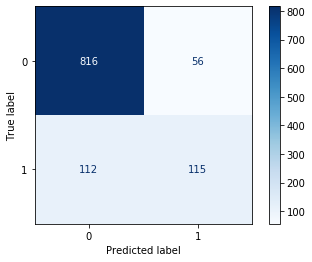

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_confusion_matrix(vanilla_mod, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [51]:
y_pred_train = vanilla_mod.predict(X_train_scaled)
y_pred_test = vanilla_mod.predict(X_test_scaled)

In [52]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8694
TEST: 0.8471
***************
Recall:
TRAIN: 0.5399
TEST: 0.5066
***************
Precision:
TRAIN: 0.7077
TEST: 0.6725
***************
F1-Score:
TRAIN: 0.6125
TEST: 0.5779
***************


In [56]:
from sklearn.metrics import roc_curve, auc
y_score = vanilla_mod.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.899825203087742


## Part 6: Pick model & find best threshold

In [58]:
vanilla_mod_b = LogisticRegression(class_weight = 'balanced')
vanilla_mod_b.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

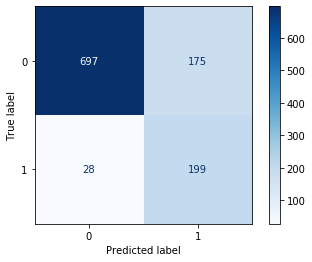

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_confusion_matrix(vanilla_mod_b, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [62]:
y_pred_train = vanilla_mod_b.predict(X_train_scaled)
y_pred_test = vanilla_mod_b.predict(X_test_scaled)

In [63]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8214
TEST: 0.8153
***************
Recall:
TRAIN: 0.8779
TEST: 0.8767
***************
Precision:
TRAIN: 0.5194
TEST: 0.5321
***************
F1-Score:
TRAIN: 0.6527
TEST: 0.6622
***************


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.001: 0.5
-------------------------------------------------------
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.01: 0.8702208705492462
-------------------------------------------------------
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi

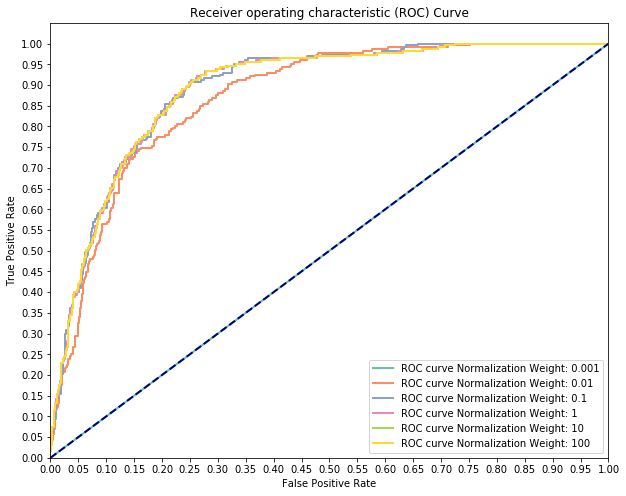

In [73]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(penalty='l1', fit_intercept = False, C = c, solver='liblinear')
    model_log = logreg.fit(X_train_scaled, y_train)
    print(model_log) # Preview model params

    # Predict
    y_predict_test = logreg.predict(X_test_scaled)

    y_score = model_log.decision_function(X_test_scaled)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## New Features

In [76]:
clean_X_train2 = clean_X_train
columns = ['TotalDayCalls', 'TotalEveCalls','TotalNightCalls', 'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall','TotalRevenue']
new_columns = ['TotalDayCalls_month', 'TotalEveCalls_month','TotalNightCalls_month', 'TotalIntlCalls_month', 'CustomerServiceCalls_month', 'TotalCall_month','TotalRevenue_month']
for v, column in enumerate(new_columns):
    clean_X_train2[column] = (clean_X_train2.iloc[ : , v]) / (clean_X_train2['tenure'])

clean_X_test2 = clean_X_test
columns = ['TotalDayCalls', 'TotalEveCalls','TotalNightCalls', 'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall','TotalRevenue']
new_columns = ['TotalDayCalls_month', 'TotalEveCalls_month','TotalNightCalls_month', 'TotalIntlCalls_month', 'CustomerServiceCalls_month', 'TotalCall_month','TotalRevenue_month']
for v, column in enumerate(new_columns):
    clean_X_test2[column] = (clean_X_test2.iloc[ : , v]) / (clean_X_test2['tenure'])

In [77]:
X_train2_scaled = scaler.fit_transform(clean_X_train2)
X_test2_scaled = scaler.transform(clean_X_test2)

In [78]:
vanilla_mod_b2 = LogisticRegression(class_weight = 'balanced')
vanilla_mod_b2.fit(X_train2_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

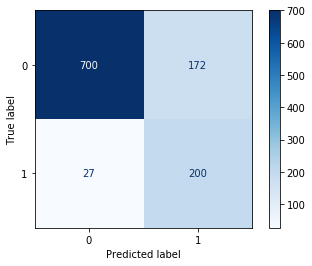

In [79]:
plot_confusion_matrix(vanilla_mod_b2, X_test2_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g")

In [80]:
y_pred_train2 = vanilla_mod_b2.predict(X_train2_scaled)
y_pred_test2 = vanilla_mod_b2.predict(X_test2_scaled)

In [81]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, y_pred_train2):.4f}")
    print(f"TEST: {metric(y_test, y_pred_test2):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8237
TEST: 0.8189
***************
Recall:
TRAIN: 0.8732
TEST: 0.8811
***************
Precision:
TRAIN: 0.5232
TEST: 0.5376
***************
F1-Score:
TRAIN: 0.6544
TEST: 0.6678
***************


## Part 7: What drives churn?

In [86]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(vanilla_mod_b2.coef_[0]),clean_X_train2.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df = pd.DataFrame.from_dict(coef_dict, columns =['Coef'], orient='index')
coef_df.sort_values(by=['Coef'], ascending = False)

,Coef
StreamingMovies_Yes,0.667275
CustomerServiceCalls,0.534806
InternetService_Fiber optic,0.496305
TotalDayMinutes,0.491648
CustomerServiceCalls_month,0.406707
InternationalPlan_Yes,0.402982
TotalEveMinutes,0.294706
TotalHighLatencyMinutes,0.213037
PaperlessBilling_Yes,0.211821
TotalNightMinutes,0.154906


## Part 8: What are your recommendations?

### Findings

- Account Information: pre-paid churned most, out of 1800 pre-paid customers in training data 426 churned total, 400 were month by monty, 23 were 2 year, 1 were 1 years contract
- Payment method: not significant
- Service engagement: StreamingMovies, CustomerServiceCalls by month, InternetService_Fiber optic, TotalDayMinutes, InternationalPlan, Voicemail



### Recommendations

- Sign up users as contract users upfront
- Develop partnerships to enhance services such as movies streaming, 5G, International Plan 
- Review our customer service program to improve customer satisfaction

### Next Steps: testing threshold

In [93]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
from sklearn.pipeline import Pipeline

In [94]:
y_train_pred_probs = vanilla_mod_b2.predict_proba(X_test2_scaled)[:, 1]

In [95]:
# Transform X_test
X_test_transformed = pipe.transform(X_test2_scaled)

# Get probabilites
y_test_pred_probs = lgrg1.predict_proba(X_test_transformed)[:, 1]

NameError: name 'pipe' is not defined

In [89]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_acc', 'test_acc'])

for x in np.arange(y_pred_train2.min(), y_pred_train2.max(), 0.01):
    placeholder = []
    threshold = x
    y_pred_train = np.where(y_pred_train2 > x, 1, 0)
    r_pred_test = np.where(y_pred_test > x, 1, 0)
    train_rec = recall_score(y_train, y_pred_train2)
    test_rec = recall_score(y_test, y_pred_test)
    placeholder = [threshold, train_rec, test_rec]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_rec', 'test_rec'])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

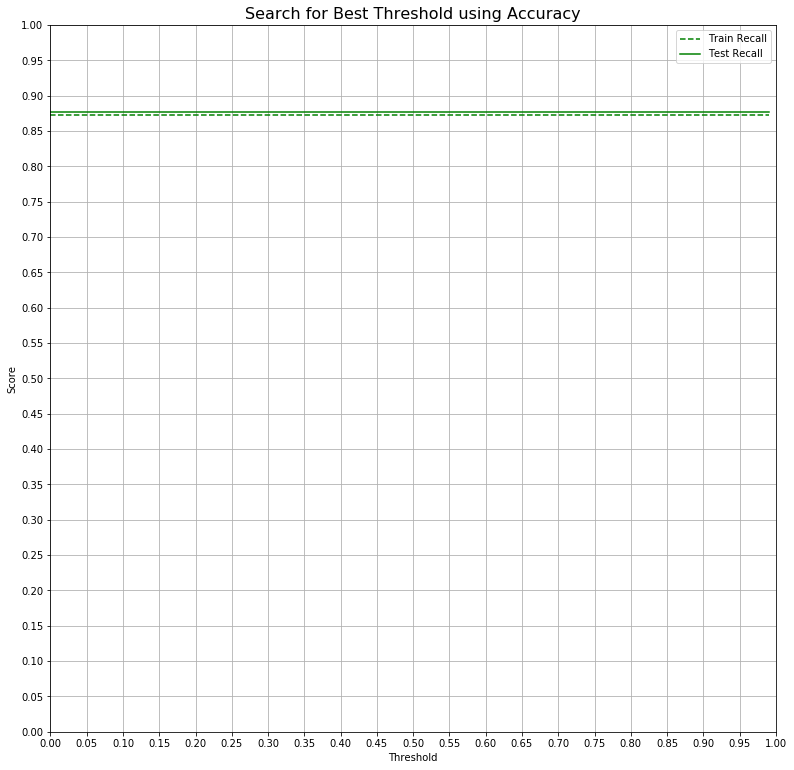

In [96]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold using Accuracy",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_pred_train2.min(), y_pred_train2.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'].values, dtype=float)

ax.plot(X_axis, metrics_df['train_rec'], ls='--',
        color='g', label='Train Recall')
ax.plot(X_axis, metrics_df['test_rec'], ls='-',
        color='g', label='Test Recall')

plt.legend()